In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items  = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [ ]:
df_orders="orders"

In [ ]:
# First I want to Merge all the order Table
#orders_data1= pd.merge(orders,order_items["product_id","seller_id","price"], how='inner', on='order_id')
#orders_data1.head()
orders_data1 = pd.merge(orders, order_items[["product_id", "seller_id", "price", "order_id"]], on='order_id')
orders_data1.head()

In [ ]:
orders_data1.shape

In [ ]:
#merging 'order_payments' and 'order_reviews' data
orders_data2= pd.merge(order_payments[["order_id", "payment_type", "payment_value","payment_installments"]],order_reviews[["order_id", "review_score"]],on='order_id')
orders_data2.head()

In [ ]:
orders_data2.shape

In [ ]:
#merging orders_data1 and orders_data2 to make final orders data
orders = pd.merge(orders_data1,orders_data2, on='order_id',how='outer')
orders.head()

In [ ]:
orders.shape

In [ ]:
orders_products = pd.merge(orders,products[["product_id", "product_category_name"]], on='product_id')
orders_products.head()

In [ ]:
orders_products.shape

(118274, 16)

In [ ]:
orders_customers = pd.merge(orders_products,customers[["customer_id", "customer_zip_code_prefix","customer_city"]], on='customer_id')
orders_customers.head()

In [ ]:
orders_customers.shape

(118274, 18)

In [ ]:
matrix_table = pd.merge(orders_customers,sellers[["seller_id","seller_zip_code_prefix","seller_city"]], on='seller_id')

In [ ]:
matrix_table.shape

(118274, 20)

In [ ]:
matrix_table.head()

In [ ]:
df=matrix_table

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,payment_value,payment_installments,review_score,product_category_name,customer_zip_code_prefix,customer_city,seller_zip_code_prefix,seller_city,price_of_product,delivery_times
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,18.12,1.0,4.0,utilidades_domesticas,3149,sao paulo,9350,maua,18.12,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,2.00,1.0,4.0,utilidades_domesticas,3149,sao paulo,9350,maua,2.00,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,18.59,1.0,4.0,utilidades_domesticas,3149,sao paulo,9350,maua,18.59,8.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,37.77,3.0,4.0,utilidades_domesticas,3366,sao paulo,9350,maua,113.31,2.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,37.77,1.0,5.0,utilidades_domesticas,2290,sao paulo,9350,maua,37.77,5.0


In [ ]:
#exploring what all payment types are used by the customers
df['payment_type'].value_counts()


credit_card    86520
boleto         22835
voucher         6282
debit_card      1692
Name: payment_type, dtype: int64

In [ ]:
df['review_score'].value_counts()

5.0    66264
4.0    22286
1.0    14854
3.0     9840
2.0     4085
Name: review_score, dtype: int64

In [ ]:
df['product_category_name'].value_counts() # these are all the products available

cama_mesa_banho                                  11980
beleza_saude                                     10029
esporte_lazer                                     9002
moveis_decoracao                                  8827
informatica_acessorios                            8150
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
#adjusting some display settings of decimal points
pd.set_option('display.precision',2)

In [ ]:
#creating the column to calculate the price of a product
df['price_of_product']=df['payment_installments']*df['payment_value']
df['price_of_product'].head()

0     18.12
1      2.00
2     18.59
3    113.31
4     37.77
Name: price_of_product, dtype: float64

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format= '%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format= '%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format= '%Y-%m-%d %H:%M:%S')





In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format= '%Y-%m-%d %H:%M:%S')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], format= '%Y-%m-%d %H:%M:%S')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], format= '%Y-%m-%d %H:%M:%S')



In [ ]:
delivery_time = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
est_delivery_time = orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']
est_real_delivery_time = est_delivery_time - delivery_time



In [ ]:
px.pie(
    order_payments.
        groupby('payment_type', as_index = False).
        size().
        rename(columns = {'payment_type': 'Payment Type', 'size': 'Number of Orders'}),
    values='Number of Orders',
    names='Payment Type',
    title='Payment Types'
)

Text(0.5, 1.0, 'Ordered quantities for 10 most commonly ordered product categories')

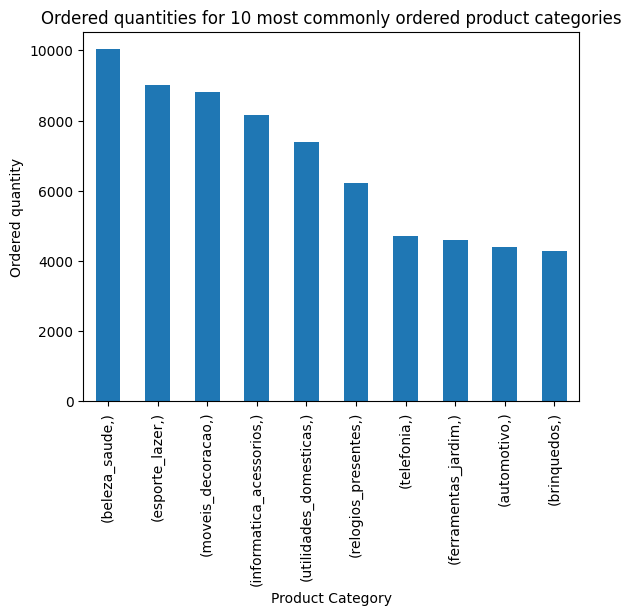

In [ ]:
rare_products = df[['product_category_name']].value_counts()[1:11].plot.bar()
rare_products.set_xlabel('Product Category')
rare_products.set_ylabel('Ordered quantity')
rare_products.set_title('Ordered quantities for 10 most commonly ordered product categories')

<Axes: >

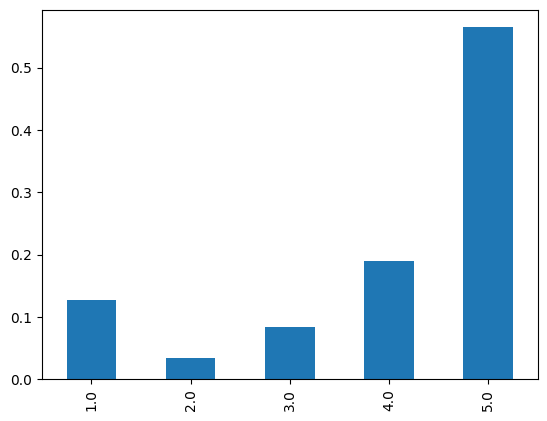

In [ ]:
df['review_score'].value_counts(normalize=True).sort_index().plot.bar()

Text(0.5, 1.0, 'Delivery time in days')

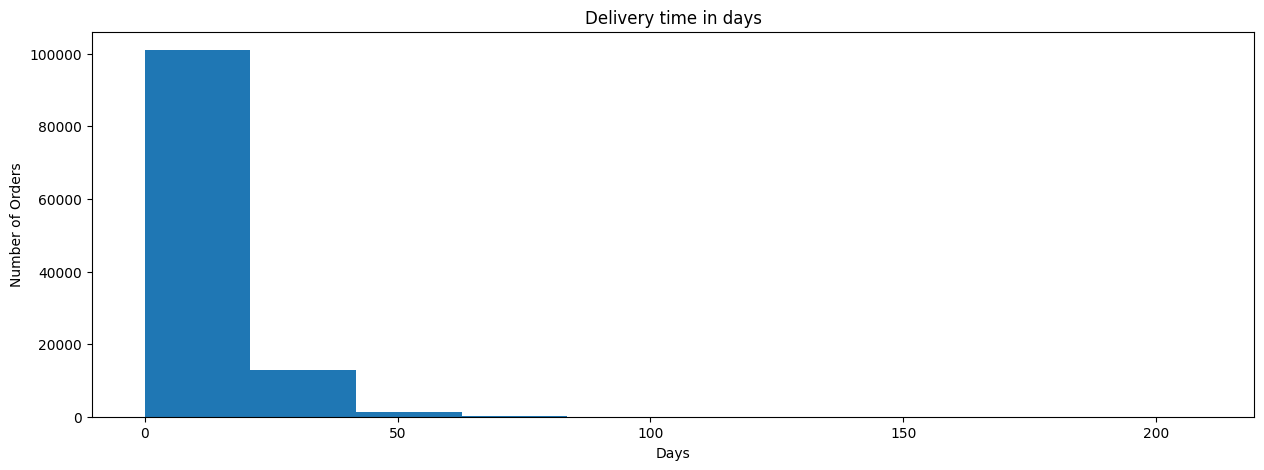

In [ ]:
delivery_time.astype('timedelta64[D]').plot.hist(figsize = (15,5), bins = 10)
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.title('Delivery time in days')

Text(0.5, 1.0, 'Estimated delivery time in days')

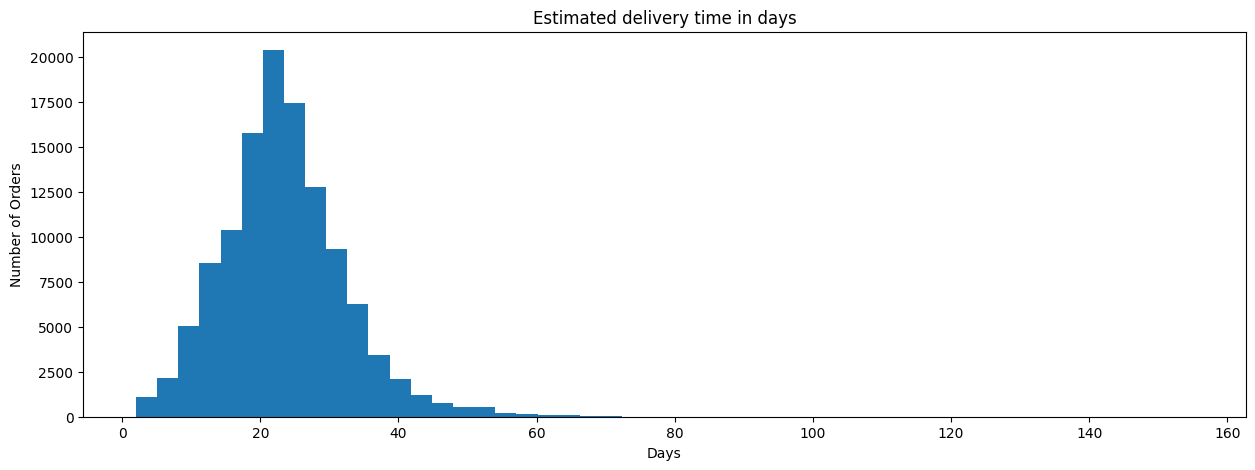

In [ ]:
est_delivery_time.astype('timedelta64[D]').plot.hist(figsize = (15,5), bins = 50)
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.title('Estimated delivery time in days')


Text(0.5, 1.0, 'Difference between estimated and actual delivery time in days')

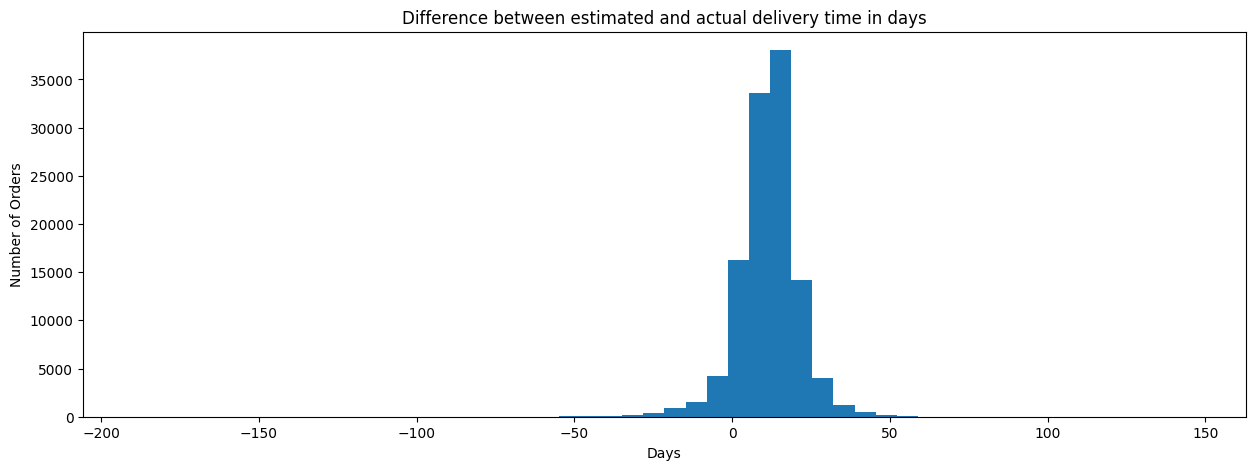

In [ ]:
est_real_delivery_time.astype('timedelta64[D]').plot.hist(figsize = (15,5), bins = 50)
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.title('Difference between estimated and actual delivery time in days')

Text(0.5, 1.0, 'Orders on different weekdays')

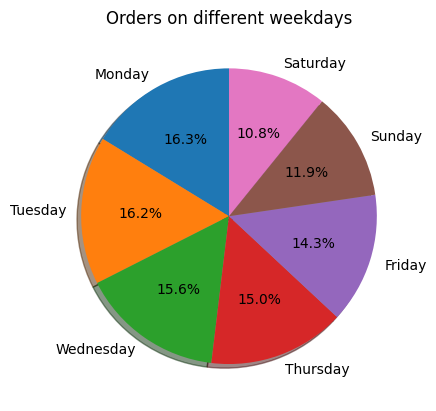

In [ ]:
import datetime as dt
order_weekdays = (orders['order_purchase_timestamp'].
    apply(lambda x: x.day_name()).
    value_counts())
plt.pie(
    order_weekdays,
    labels=order_weekdays.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title('Orders on different weekdays')

In [ ]:
df["delivery_times"] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
fig = px.scatter(df, x='delivery_times', y='review_score',
             title='Relation between Review Score with Delivery_times')

fig.show()

In [ ]:
fig = px.scatter(df, x='payment_type', y='payment_installments',
             title='Relation between payment_installments and payment_type')

fig.show()